## Import necessary libraries.

## ● Data Loading and Exploration. (10 points)
1. Import necessary libraries.
2. Display a sample of five rows of the data frame.
3. Check the shape of the data (number of rows and columns). Check the
general information about the dataframe using the .info() method.
4. Check the percentage of missing values in each column of the data
frame.
5. Check if there are any duplicate rows.
6. Write a function that will impute missing values of the columns “STATE”,
“POSTALCODE”,“TERRITORY” with its most occurring label.
7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.
8. Convert the labels of the STATUS column to 0 and 1. For Shipped assign
value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In
Process’, 'Disputed') assign 0. Note we will consider everything apart from
Shipped as cancel (i.e. 0).
9. Assign ‘STATUS’ column into a label variable and drop it from the original
Dataframe. Convert the original dataframe to the dummy coded
data.(Hint:-use pd.get_dummies()).
10. Use StandardScaler to scale the data.

In [538]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


from scipy.stats import zscore
import missingno as msno

In [539]:
# Read the dataset
sales_df = pd.read_csv("C:/Users/Omkar Jawaji/Desktop/PG IIITH_GL/Assignments/Week-3/sales_data_sample.csv", encoding="latin1")  

In [540]:
# Display a sample of five rows of the data frame.
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [541]:
sales_df.shape

(2823, 25)

In [542]:
# Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [543]:
sales_df.iloc[0]["POSTALCODE"]

'10022'

In [544]:
sales_df.isnull().mean() * 100

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [545]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

<Axes: >

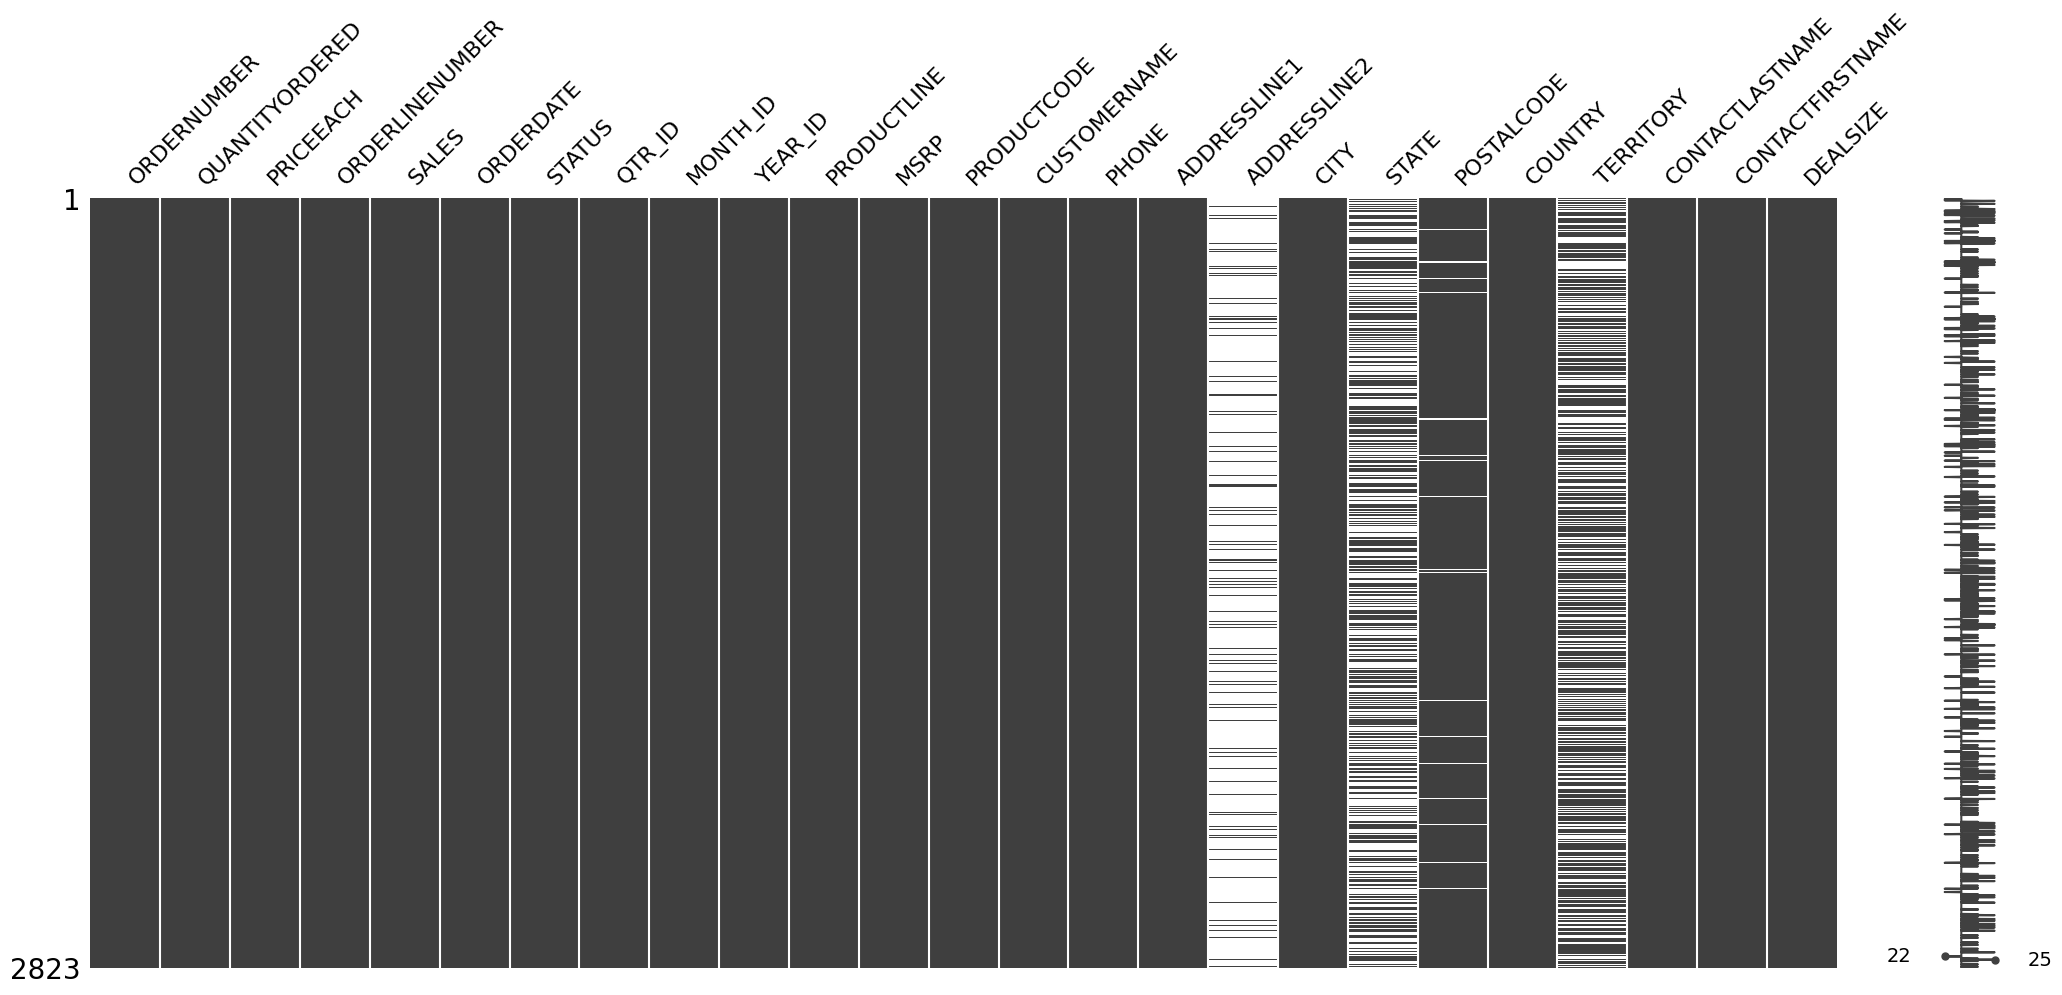

In [546]:
msno.matrix(sales_df)

<Axes: >

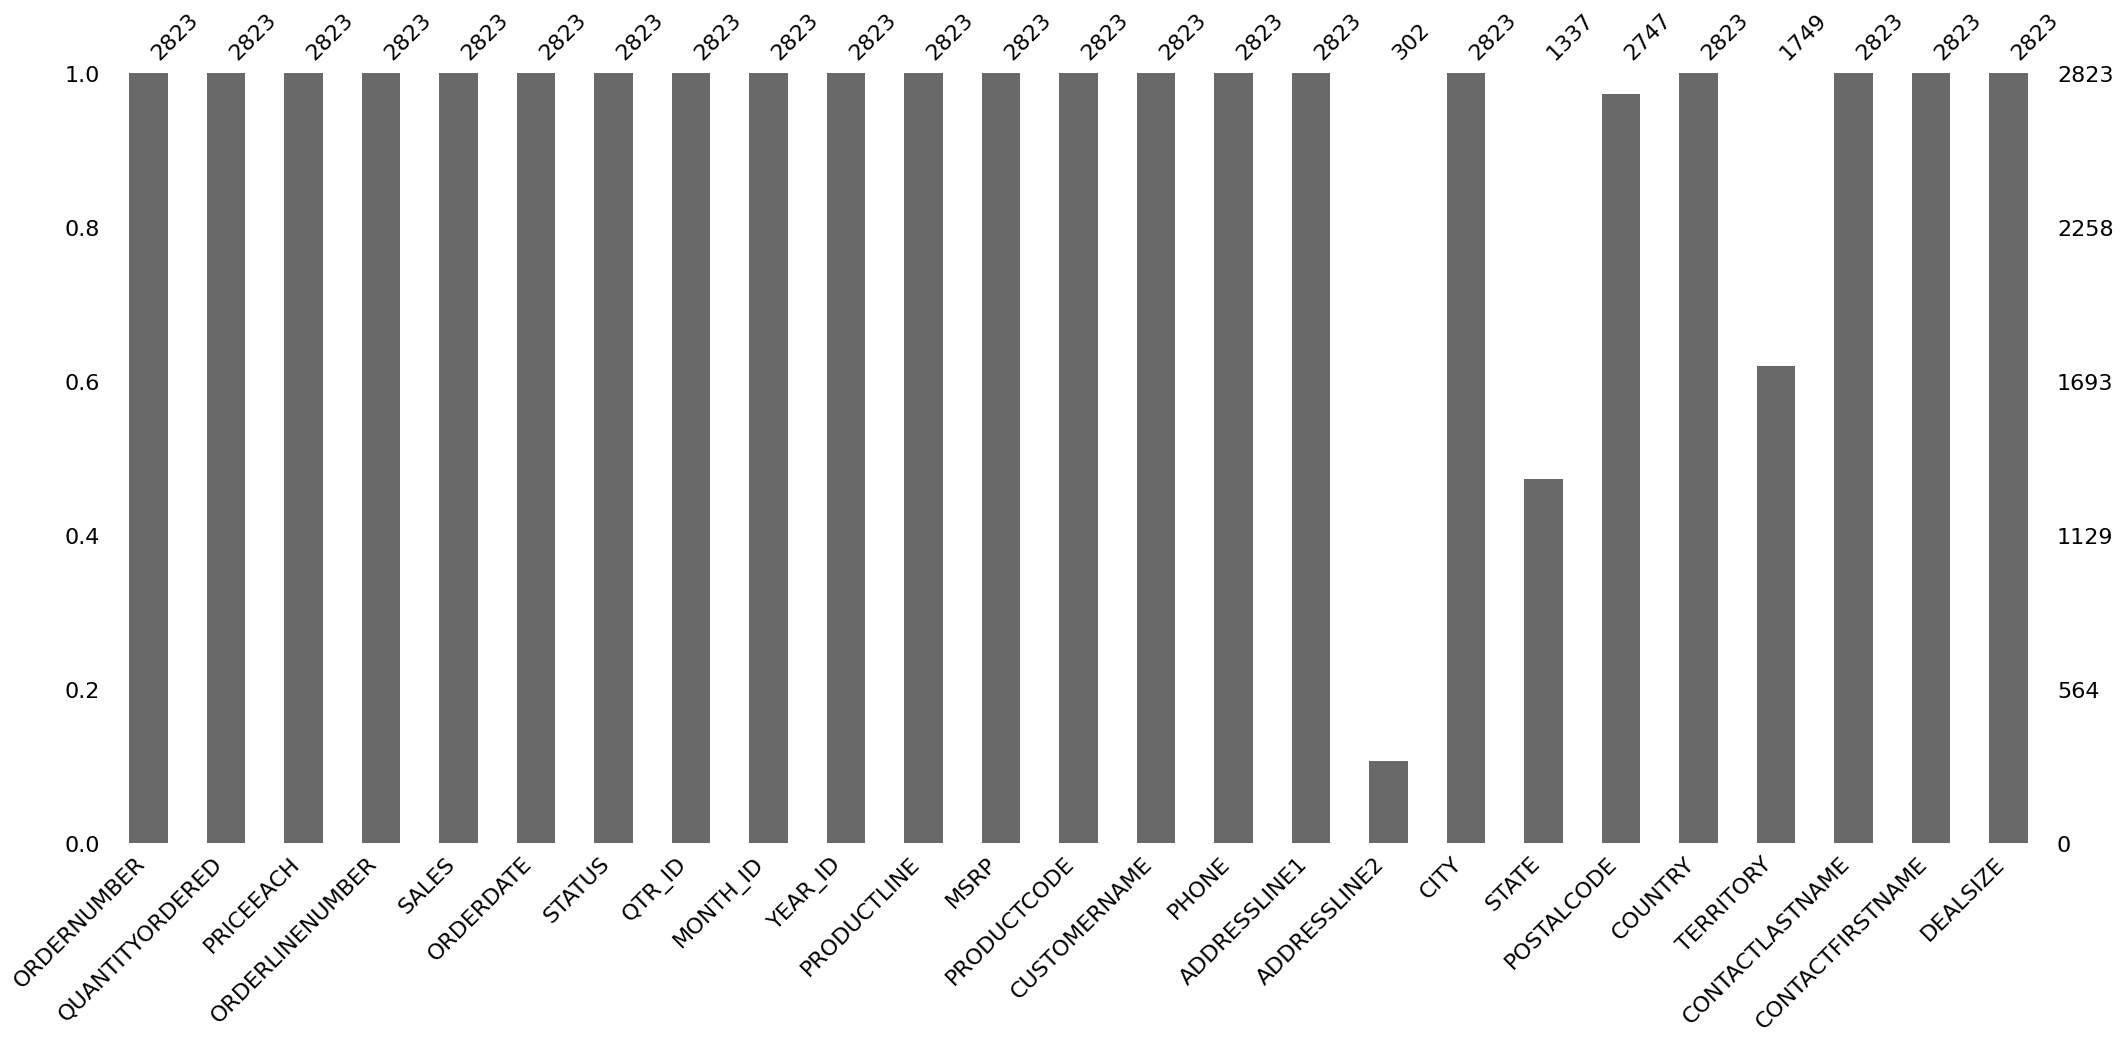

In [547]:
msno.bar(sales_df)

<Axes: >

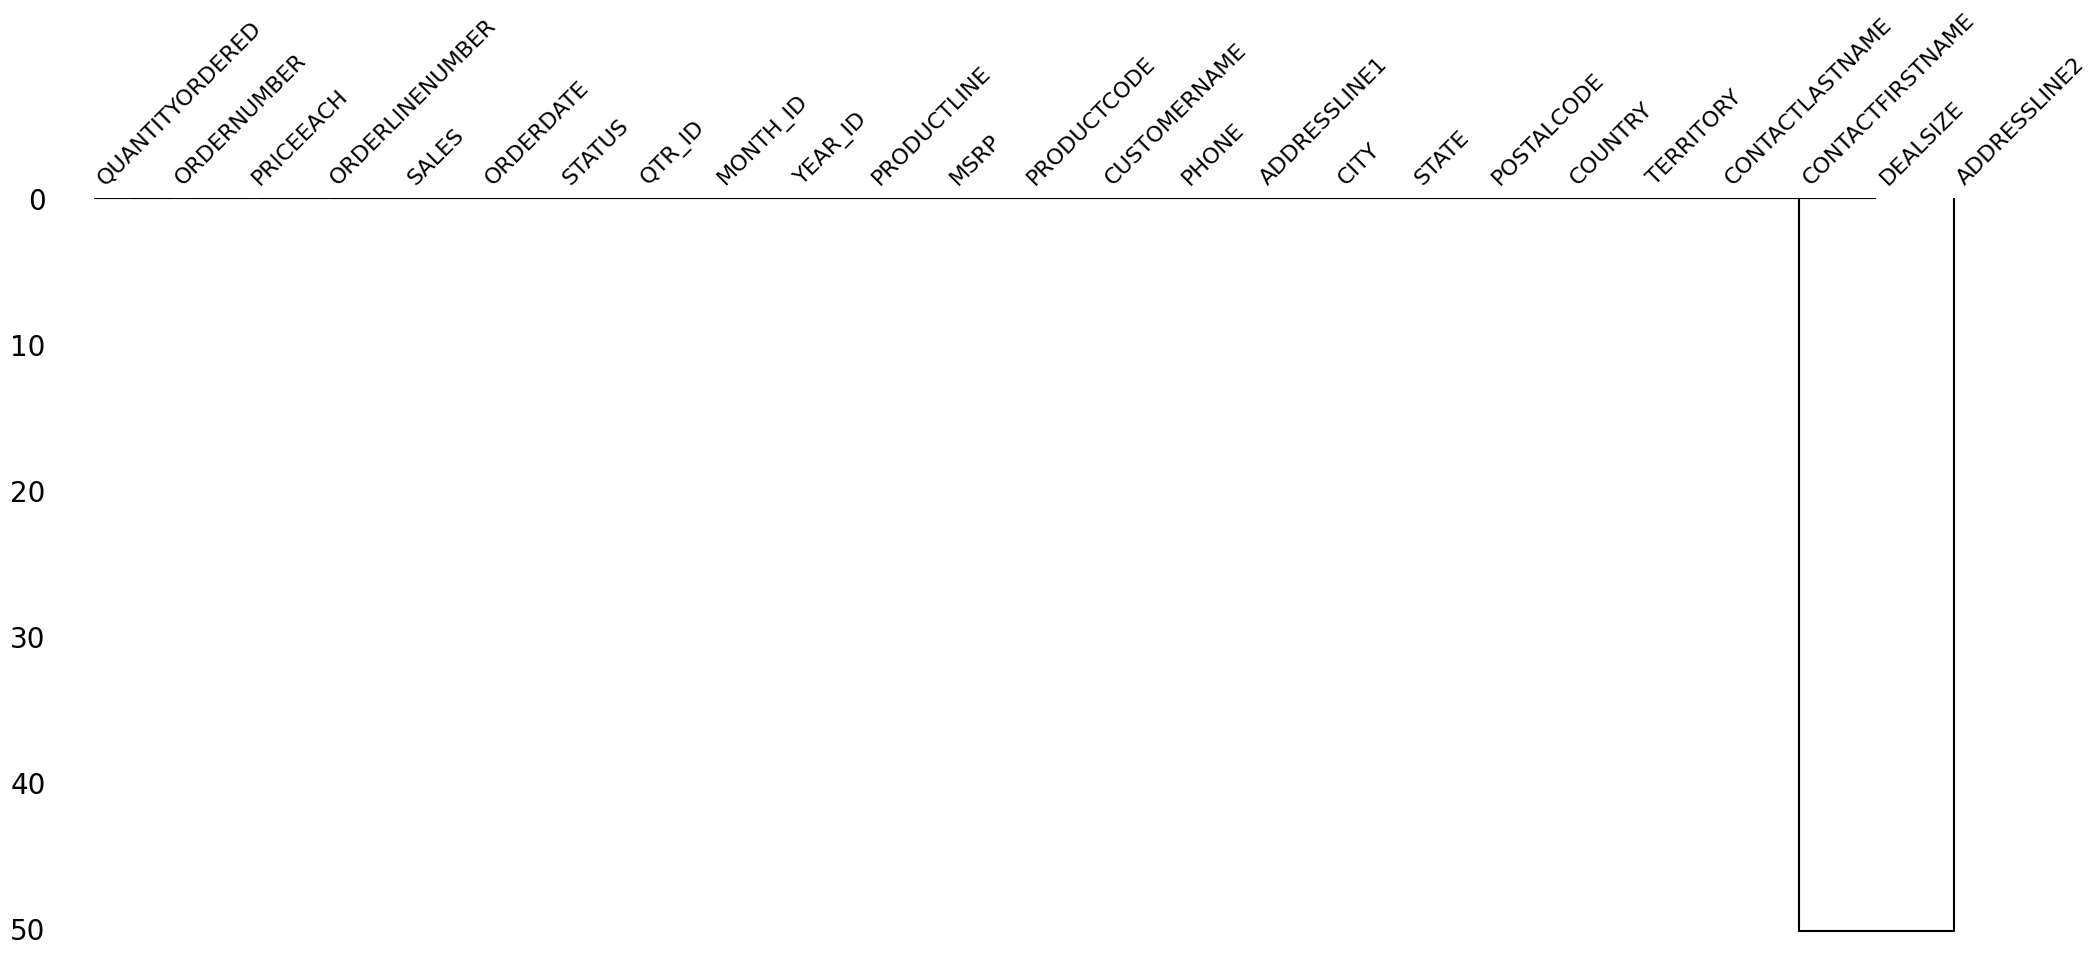

In [579]:
msno.dendrogram(sales_df)

In [549]:
sales_df = sales_df.drop_duplicates()

In [550]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [551]:
sales_df[['STATE','POSTALCODE','TERRITORY']] = sales_df[['STATE','POSTALCODE','TERRITORY']].fillna(sales_df.mode().iloc[0])

In [552]:
sales_df_subset = sales_df[["QUANTITYORDERED", "ORDERLINENUMBER", "PRICEEACH", "SALES", 
                     "STATUS", "PRODUCTLINE", "MSRP","PRODUCTCODE",'MONTH_ID', 'YEAR_ID',
                    'STATE','POSTALCODE','TERRITORY', "CITY", "DEALSIZE"]].copy()

In [554]:
sales_df_subset.head()

,QUANTITYORDERED,ORDERLINENUMBER,PRICEEACH,SALES,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,MONTH_ID,YEAR_ID,STATE,POSTALCODE,TERRITORY,CITY,DEALSIZE
0,30,2,95.70,2871.00,Shipped,Motorcycles,95,S10_1678,2,2003,NY,10022,EMEA,NYC,Small
1,34,5,81.35,2765.90,Shipped,Motorcycles,95,S10_1678,5,2003,CA,51100,EMEA,Reims,Small
2,41,2,94.74,3884.34,Shipped,Motorcycles,95,S10_1678,7,2003,CA,75508,EMEA,Paris,Medium
3,45,6,83.26,3746.70,Shipped,Motorcycles,95,S10_1678,8,2003,CA,90003,EMEA,Pasadena,Medium
4,49,14,100.00,5205.27,Shipped,Motorcycles,95,S10_1678,10,2003,CA,28034,EMEA,San Francisco,Medium


In [555]:
sales_df_subset['SALES'].min(), sales_df_subset['SALES'].max()
sales_df_subset['MSRP'].value_counts()

MSRP
118    104
99     103
136     80
62      78
68      77
      ... 
73      23
41      22
170     22
71      22
92      22
Name: count, Length: 80, dtype: int64

In [556]:
categorical_columns = ['PRODUCTLINE', 'PRODUCTCODE', 'DEALSIZE','STATE','POSTALCODE','TERRITORY', 'CITY', 'YEAR_ID']

label_encoder = LabelEncoder()
for column in categorical_columns:
    sales_df_subset[column] = label_encoder.fit_transform(sales_df_subset[column])

In [557]:
sales_df_subset["STATUS"] = sales_df_subset["STATUS"].map({"Shipped":1,
                                                           "In Process":0, 
                                                           "Resolved":0, 
                                                           "Cancelled":0, 
                                                           "On Hold":0, 
                                                           "Disputed":0})

In [558]:
sales_df_subset = pd.get_dummies(sales_df_subset, columns=['STATUS'])


In [559]:
X = sales_df_subset.loc[:,~sales_df_subset.columns.isin(["STATUS_0", "STATUS_1"])]
y = sales_df_subset["STATUS_1"]

In [560]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [561]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00035436e+00 -1.84031742e-02  5.56600492e-03  5.51621595e-01
  -7.75483864e-03  1.78872981e-02 -5.40171888e-03 -3.90621839e-02
   6.95595227e-02 -3.25354770e-02  6.96025547e-03  3.72261095e-02
   7.49511044e-03 -4.76557672e-01]
 [-1.84031742e-02  1.00035436e+00 -2.09719899e-02 -5.84210774e-02
  -6.42832081e-03 -2.10749335e-02  3.40990075e-02  3.40282735e-02
  -5.73873904e-02 -2.51189176e-02 -1.30670165e-02  2.04959494e-02
   2.89924913e-02  5.77013828e-02]
 [ 5.56600492e-03 -2.09719899e-02  1.00035436e+00  6.58074040e-01
  -1.30887487e-01  6.70862591e-01 -2.76098443e-01  5.15379243e-03
  -5.94057461e-03  1.20574418e-02  1.08591983e-02  1.05535302e-02
  -6.78237806e-03 -6.30648995e-01]
 [ 5.51621595e-01 -5.84210774e-02  6.58074040e-01  1.00035436e+00
  -1.60411273e-01  6.35464537e-01 -3.36074036e-01 -9.60858937e-03
   3.56595249e-02 -4.68673282e-03 -4.64561922e-03  3.58115319e-02
   1.72881921e-02 -8.63119811e-01]
 [-7.75483864e-03 -6.42832081e-03 -1.30887487e

In [562]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.12893699e-01 -2.80729366e-01 -3.16150456e-01  4.30573322e-01
  -1.27842736e-01  1.11878014e-01 -6.44061768e-01 -3.97415300e-02
  -4.05655705e-02 -2.69752857e-01  2.14649992e-01 -9.60204337e-02
   1.18914049e-01  3.76846269e-02]
 [ 3.60117023e-02  4.53871596e-02  1.48836776e-02 -2.78693450e-02
   1.58933366e-02 -1.33311395e-01  7.75339213e-03  1.04422638e-02
  -6.50015944e-02 -5.76750204e-02 -1.19999608e-02 -6.72863312e-01
   5.26819474e-02 -7.17101958e-01]
 [-4.21649147e-01  8.04387188e-02 -2.18350064e-01  5.34972635e-01
   3.87226091e-01 -5.05332669e-02  1.69210341e-01  1.58865186e-02
   5.10241112e-02  4.48688525e-01 -2.53679898e-01  5.99144401e-02
  -1.16550425e-01 -1.22616788e-01]
 [-4.97953152e-01 -8.58755424e-02  8.31825984e-01 -1.78682020e-03
  -1.43644997e-02  3.08702883e-02 -2.21355087e-01  4.30982003e-03
   2.21350006e-03  4.53585707e-02 -8.67462581e-03 -1.51113776e-02
  -7.40328773e-03 -1.15635443e-02]
 [ 1.48733246e-01 -9.67536027e-02  1.20128640e-03 

In [582]:
# Making a set of (eigenvalue, eigenvector) pair
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extracting descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print()
print('Eigenvalues in descending order:\n', eigvalues_sorted)

[(3.4331736639415116, array([-0.2128937 ,  0.0360117 , -0.42164915, -0.49795315,  0.14873325,
       -0.44289823,  0.28313802,  0.00726386, -0.01190595, -0.00080923,
        0.00493876, -0.01918179, -0.01196981,  0.47797044])), (1.5648391516654414, array([-0.28072937,  0.04538716,  0.08043872, -0.08587554, -0.0967536 ,
        0.13397383, -0.17162812,  0.45736334, -0.41102923,  0.46738522,
       -0.34517545, -0.31275803, -0.16937404,  0.07932927])), (1.4344596998129393, array([ 0.11187801, -0.13331139, -0.05053327,  0.03087029,  0.04224554,
       -0.0613044 ,  0.01744266, -0.42165688,  0.50354982,  0.44361415,
       -0.4039011 , -0.40429927,  0.07117527, -0.02339358])), (1.2801023005036745, array([-0.64406177,  0.00775339,  0.16921034, -0.22135509, -0.26473011,
        0.31356326, -0.33352345, -0.28948166,  0.22397905, -0.12358185,
        0.0857951 ,  0.06363969,  0.14226774,  0.21670864])), (1.0436054940456867, array([-0.09602043, -0.67286331,  0.05991444, -0.01511138,  0.15635059

In [564]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

## PCA FOR VISUALIZATION (4 points)
1. Take the help of PCA to reduce the data to 2 dimensions. Use
n_components=2. (2 points)
2. Take the first and second principal components and plot a scatter plot
with the labels. (1 point)
3. Write the intuitions about the scatter plot. (1 point)

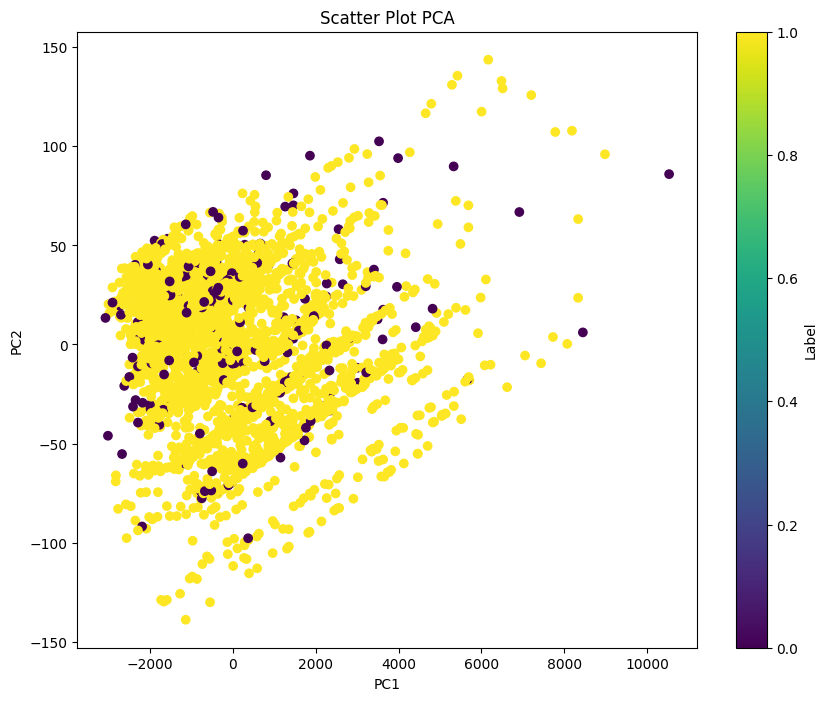

In [584]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Label'] = y

plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Label'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot PCA')
plt.colorbar(label='Label')
plt.show()

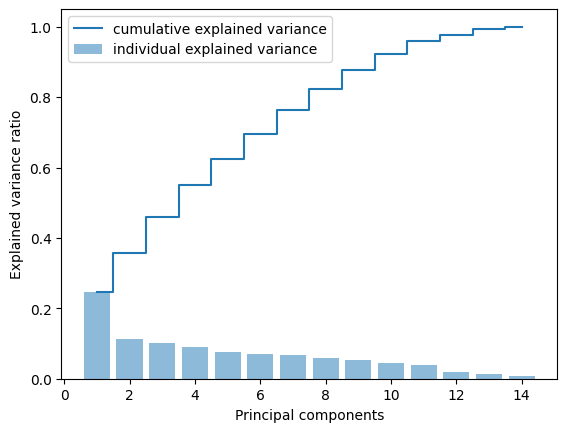

In [587]:
plt.bar(range(1,15), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,15),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

## PCA FOR DIMENSION REDUCTION. (5 points)
1. Fit the PCA model on the data and plot a graph between n_components
and cumulative explained variance. (3 points)
2. In how many components we are getting approximately 90% of explained
Variance. (2 points)

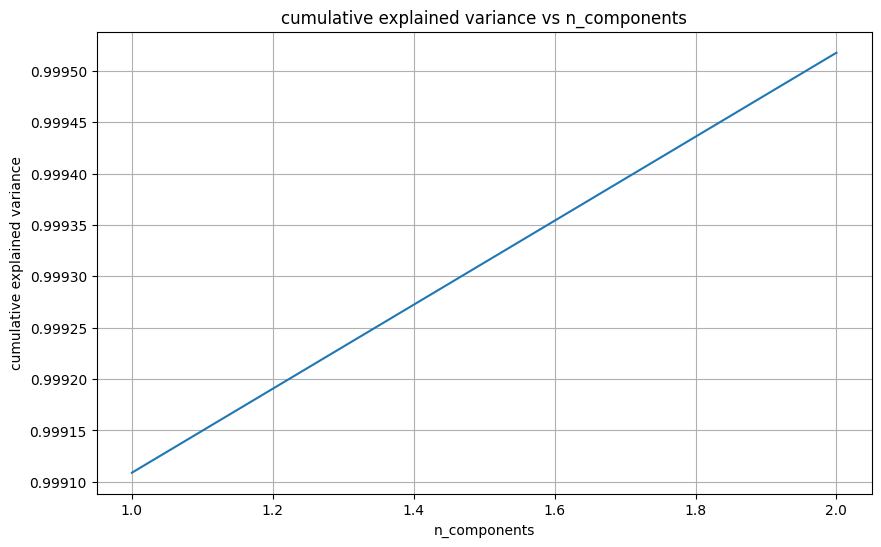

In [590]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')
plt.title('cumulative explained variance vs n_components')
plt.grid(True)
plt.show()

In [591]:
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print("Components of 90% explained variance:", n_components_90)

Components of 90% explained variance: 1


In [569]:
P_reduce = np.array(eigvectors_sorted[0:7])
X_std_6D = np.dot(X_std,P_reduce.T) 
Proj_data_df = pd.DataFrame(X_std_6D)


In [570]:
Proj_data_df.shape, y.shape

((2823, 7), (2823,))

In [571]:
sales_df_subset1 = sales_df_subset.copy()
def bucket_data(df, col_name, step_cnt):
    bins = [x for x in range(0,int(df[col_name].max())+1,step_cnt)]
    df[str(col_name)+"_"] = pd.cut(df[col_name], bins)
    return df

sales_df_subset1 = bucket_data(sales_df_subset1, 'QUANTITYORDERED',10)
sales_df_subset1 = bucket_data(sales_df_subset1, 'PRICEEACH',10)
sales_df_subset1 = bucket_data(sales_df_subset1, 'SALES',1000)
sales_df_subset1 = bucket_data(sales_df_subset1, 'MSRP',10)

one_hot_columns = ['QUANTITYORDERED_','PRICEEACH_','SALES_','MSRP_']

sales_df_subset2 = sales_df_subset1.copy()

In [572]:
sales_df_subset2.columns

Index(['QUANTITYORDERED', 'ORDERLINENUMBER', 'PRICEEACH', 'SALES',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'MONTH_ID', 'YEAR_ID', 'STATE',
       'POSTALCODE', 'TERRITORY', 'CITY', 'DEALSIZE', 'STATUS_0', 'STATUS_1',
       'QUANTITYORDERED_', 'PRICEEACH_', 'SALES_', 'MSRP_'],
      dtype='object')

In [573]:
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(sales_df_subset2[one_hot_columns])
sales_df_subset2 = sales_df_subset2.drop(one_hot_columns, axis=1)

In [574]:
preprocessed_data = np.concatenate((X_std, encoded_categorical.toarray()), axis=1)

## ● LDA. (5 points)
1. Split the dataset into two parts (i.e. 80% train and 20% test) using
random_state=42. (1 point)
2. Train a Linear Discriminant Analysis(LDA) model on the train data. Do
fit_transform on the train data and only transform on the test data. Use
n_components=1. (2 points)
3. Train a RandomForest classifier model on the transformed train and test
data. Print the accuracy score. (2 points)

In [575]:
from sklearn import model_selection

test_size = 0.20 # 80:20 training and test set
random_state = 42 
X_train, X_test, y_train, y_test = model_selection.train_test_split(preprocessed_data, y, test_size=test_size, random_state=random_state)

In [576]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [577]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of LDA model:", accuracy)

Accuracy of LDA model: 0.9097345132743363


In [578]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9327433628318584
